## Análisis EDA: Asignación

### 1. Carga de datos

In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [27]:
asignacion_df = pd.read_csv('../../data/Cleaned/cleaned_asignacion_data.csv')
asignacion_df.to_parquet('../../data/Cleaned/parquet_files/cleaned_asignacion_data.parquet')

In [28]:
asignacion_df = pd.read_parquet('../../data/Cleaned/parquet_files/cleaned_asignacion_data.parquet')

In [29]:
asignacion_df.shape

(828542, 19)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [30]:
asignacion_df.head()

,cve_expediente,cve_contrato,status,description_award,title_award,contract_start_date,contract_end_date,value_amount,value_currency,suppliers_id,suppliers_name,docs_url_awards,docs_title_awards,docs_language_awards,docs_id_awards,docs_format_awards,docs_type_awards,docs_descr_awards,docs_date_published_awards
0,975480,964520,active,"CONTRATO PLURIANUAL 2015 ¿ 2018, BAJO LA MODAL...",SERVICIO INTEGRAL DE ARRENDAMIENTO DE EQUIPO D...,2015-06-01 00:00:00+00:00,2018-05-31T23:59:00Z,8474040.00,MXN,TPL030219RE3,TEC PLUSS SA DE CV,None,None,None,NaN,None,None,None,None
1,1016499,1019413,active,"SERVICIO DE ATENCIÓN DE ASUNTOS LABORALES, REV...",SERVICIOS DE ASESORÍA JURÍDICA,2016-01-01 00:00:00+00:00,2016-12-31T23:59:00Z,2844000.00,MXN,VAB140128J79,VERNIS ABOGADOS SC,None,None,None,NaN,None,None,None,None
2,1004872,1025677,active,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DEL PARQ...,MANTENIMIENTO PREVENTIVO Y CORRECTIVO AL PARQU...,2016-02-29 17:01:00+00:00,2016-12-31T12:00:00Z,650000.02,MXN,ASI941004139,AUTOMOTRIZ Y SERVICIO INTEGRAL SA DE CV,None,None,None,NaN,None,None,None,None
3,1036167,1043633,active,None,"AGROASEMEX, S.A.",2016-03-01 00:00:00+00:00,2016-12-31T23:59:00Z,3159900.00,MXN,AGR900605VC6,"AGROASEMEX, S.A.",None,None,None,NaN,None,None,None,None
4,1057507,1070559,active,"Servicios informáticos de adecuación, mantenim...","Servicios informáticos de adecuación, mantenim...",2017-01-01 09:00:00+00:00,2017-02-28T23:59:00Z,201116.60,MXN,CSB080408DB8,CONSULTORES Y SOLUCIONES BAJAWARE S DE RL DE CV,None,None,None,NaN,None,None,None,None


In [31]:
asignacion_df.tail()

,cve_expediente,cve_contrato,status,description_award,title_award,contract_start_date,contract_end_date,value_amount,value_currency,suppliers_id,suppliers_name,docs_url_awards,docs_title_awards,docs_language_awards,docs_id_awards,docs_format_awards,docs_type_awards,docs_descr_awards,docs_date_published_awards
828537,2530370,2988590,active,SERVICIO URGENTE DE HOSPITALICACIÓN EN HERMOSILLO,AA-051GYN051-E223-2022 - HOSPITALIZACION,2022-11-17 01:00:00+00:00,2022-11-19T00:59:00Z,284110.92,MXN,HSJ040622G70,HOSPITAL SAN JOSE DE HERMOSILLO SA DE CV,None,None,None,NaN,None,None,None,None
828538,2530370,2988591,active,SERVICIO URGENTE DE HOSPITALICACIÓN EN HERMOSILLO,AA-051GYN051-E223-2022 - HOSPITALIZACION,2022-11-24 01:00:00+00:00,2022-11-29T00:59:00Z,562472.90,MXN,HSJ040622G70,HOSPITAL SAN JOSE DE HERMOSILLO SA DE CV,None,None,None,NaN,None,None,None,None
828539,2514002,2988594,active,ADQUISICION DE REFACCIONES Y ACCESORIOS MENORE...,AA-051GYN051-E190-2022 - REFACCIONES Y ACCESOR...,2022-01-26 01:00:00+00:00,2022-12-09T00:59:00Z,201500.00,MXN,MIH081022P31,MEDICA INTEGRAL HDM SA DE CV,None,None,None,NaN,None,None,None,None
828540,2514002,2988595,active,ADQUISICION DE REFACCIONES Y ACCESORIOS MENORE...,AA-051GYN051-E190-2022 - REFACCIONES Y ACCESOR...,2022-02-18 01:00:00+00:00,2022-12-07T00:59:00Z,96554.50,MXN,7BCF56E1EFFE7DF85FCC761F4B7F34BA,JESUS ENRIQUE AGUIRRE FELIX,None,None,None,NaN,None,None,None,None
828541,2547289,2988639,active,ADQUISICION DE MATERIAL DE OSTEOSINTESIS,AA-051GYN051-E244-2022 - MATERIAL DE OSTEOSINT...,2022-10-10 02:00:00+00:00,2023-01-01T00:59:00Z,139655.17,MXN,ASO080422A46,AO SOLUCIONES ORTOPEDICAS SA DE CV,None,None,None,NaN,None,None,None,None


#### 2.2 Información General

In [32]:
asignacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828542 entries, 0 to 828541
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   cve_expediente              828542 non-null  int64  
 1   cve_contrato                828542 non-null  int64  
 2   status                      826928 non-null  object 
 3   description_award           789388 non-null  object 
 4   title_award                 828541 non-null  object 
 5   contract_start_date         828542 non-null  object 
 6   contract_end_date           828316 non-null  object 
 7   value_amount                828542 non-null  float64
 8   value_currency              828542 non-null  object 
 9   suppliers_id                828528 non-null  object 
 10  suppliers_name              828542 non-null  object 
 11  docs_url_awards             140262 non-null  object 
 12  docs_title_awards           140262 non-null  object 
 13  docs_language_

In [33]:
column_stats = []
# Recorrer las columnas del dataframe
for col in asignacion_df.columns:
    num_values = asignacion_df[col].count()
    num_unique_values = asignacion_df[col].nunique()
    column_stats.append([col, num_values, num_unique_values])

# Crear un nuevo dataframe con las estadísticas
column_stats_df = pd.DataFrame(column_stats, columns=['nombre de la columna', 'numero de valores', 'numero de valores únicos'])

# Mostrar el dataframe resultante
column_stats_df

,nombre de la columna,numero de valores,numero de valores únicos
0,cve_expediente,828542,546223
1,cve_contrato,828542,828542
2,status,826928,4
3,description_award,789388,356977
4,title_award,828541,353217
5,contract_start_date,828542,77502
6,contract_end_date,828316,19360
7,value_amount,828542,473964
8,value_currency,828542,6
9,suppliers_id,828528,111133


#### 2.3 Estadísticas descriptivas

In [34]:
asignacion_df[['value_amount']].describe()

,value_amount
count,828542.00
mean,2691446.78
std,125918393.14
min,0.00
25%,38962.95
50%,112949.99
75%,387931.03
max,77259004011.00


### 3. Análisis Univariado

#### 3.1 Variables Numéricas

value_amount_tender

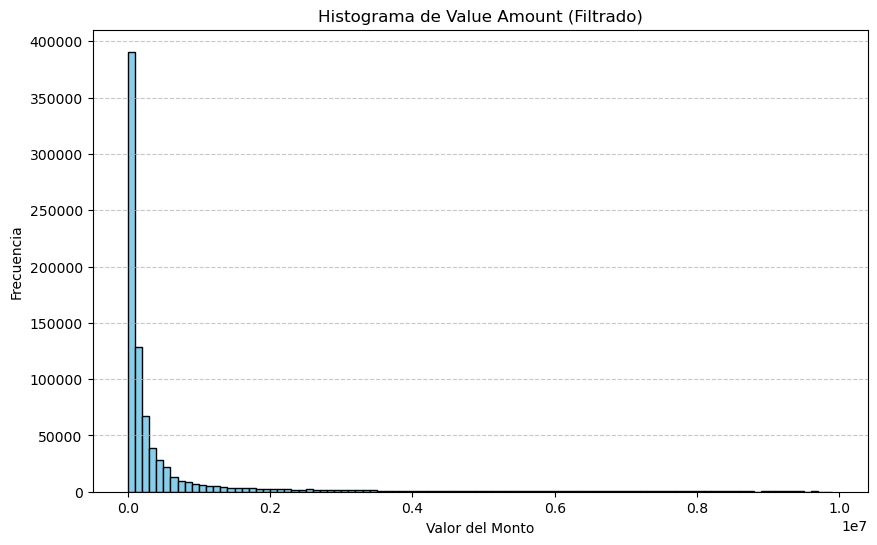

In [35]:
import numpy as np

# Definir el rango máximo para la visualización del histograma
max_value = 1e7  # Por ejemplo, 10 millones

# Filtrar los datos para estar dentro del rango de interés
filtered_data = asignacion_df[asignacion_df['value_amount'] <= max_value]['value_amount']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=np.arange(0, max_value, 1e5), color='skyblue', edgecolor='black')
plt.xlabel('Valor del Monto')
plt.ylabel('Frecuencia')
plt.title('Histograma de Value Amount (Filtrado)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 4.2 Variables Categóricas

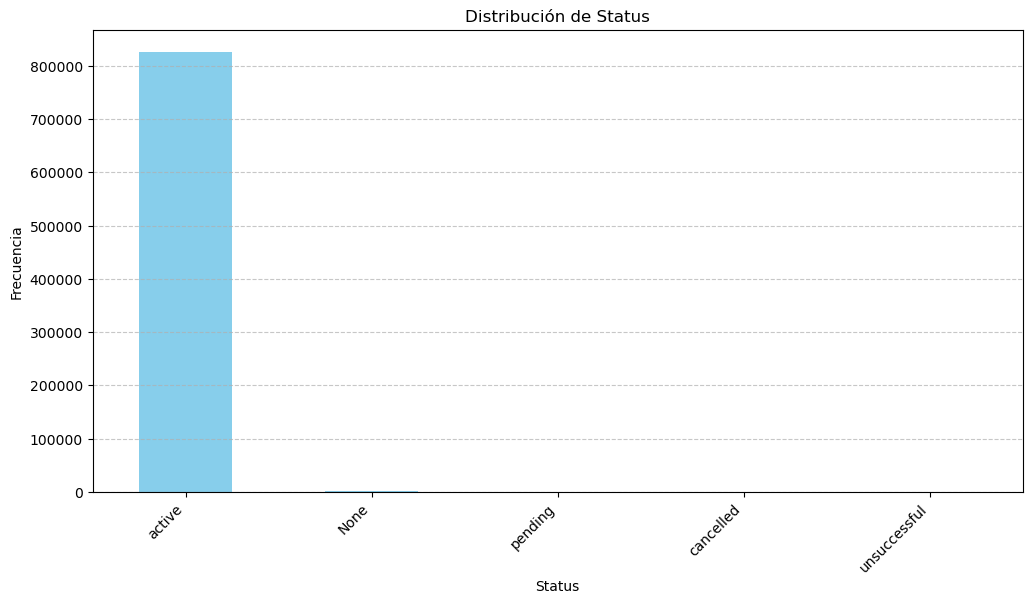

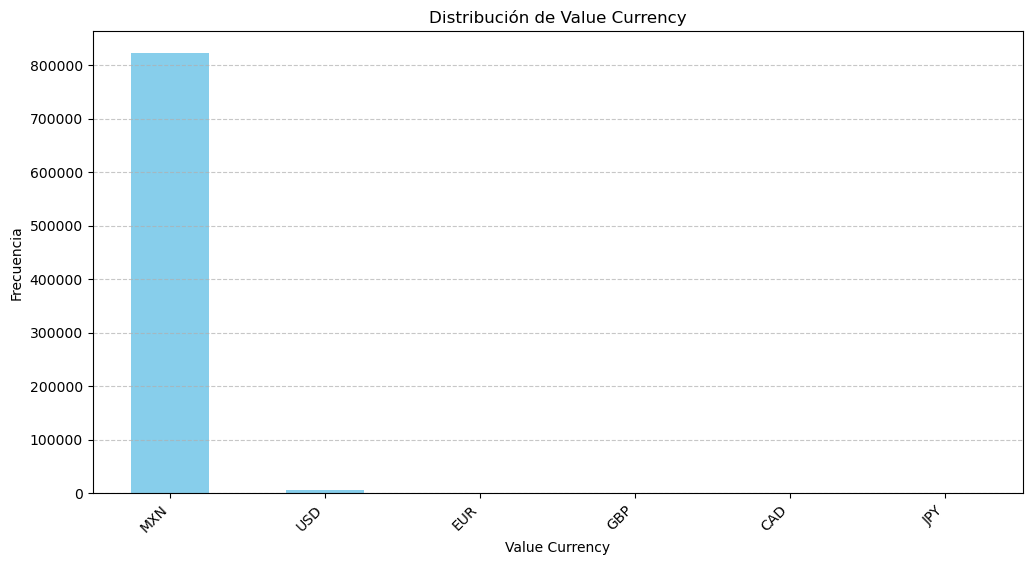

In [36]:
import matplotlib.pyplot as plt

# Generar histograma para la variable 'status'
plt.figure(figsize=(12, 6))
asignacion_df['status'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.title('Distribución de Status')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Generar histograma para la variable 'value_currency'
plt.figure(figsize=(12, 6))
asignacion_df['value_currency'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.xlabel('Value Currency')
plt.ylabel('Frecuencia')
plt.title('Distribución de Value Currency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 5. Detección de Outliers

#### 5.1 IQR (Rango intercuartil)

In [37]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [38]:
# Detecting outliers in number_tenderers
outliers_value_amount = detect_outliers(asignacion_df, 'value_amount')
print(f"Outliers in 'value_amount': {len(outliers_value_amount)}")

Outliers in 'value_amount': 120640


#### 5.2 Box Plots

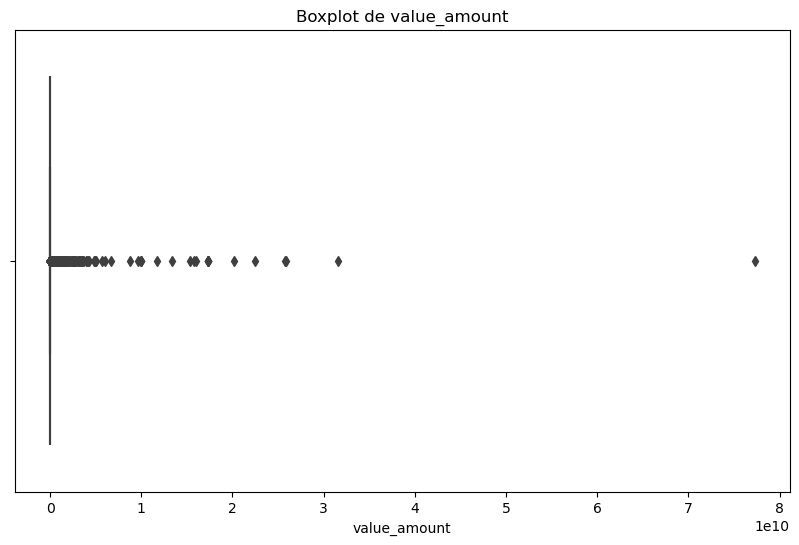

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=asignacion_df['value_amount'])
plt.title('Boxplot de value_amount')
plt.show()

### 6. Análisis Multivariado

Análisis de dispersión (scatter plot) entre value_amount y contract_start_date
Esto puede ayudarnos a entender si hay alguna tendencia en el valor de los contratos a lo largo del tiempo.

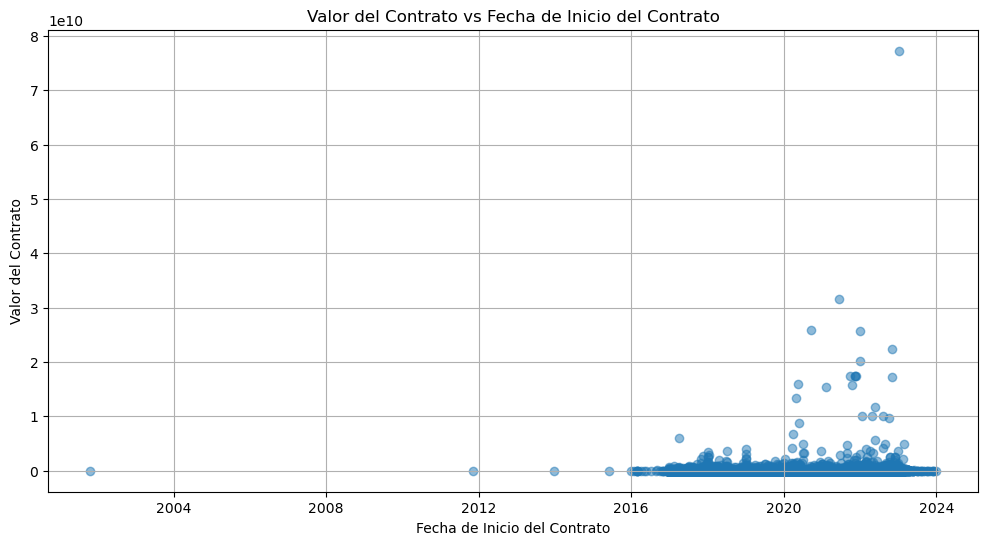

In [40]:
asignacion_df['contract_start_date'] = pd.to_datetime(asignacion_df['contract_start_date'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.scatter(asignacion_df['contract_start_date'], asignacion_df['value_amount'], alpha=0.5)
plt.xlabel('Fecha de Inicio del Contrato')
plt.ylabel('Valor del Contrato')
plt.title('Valor del Contrato vs Fecha de Inicio del Contrato')
plt.grid(True)
plt.show()

### 7. Preguntas de Negocio

#### 7.1 Porcentaje de contratos sin registro del tipo de moneda”

In [41]:
import matplotlib.pyplot as plt

# Filtrar contratos con valor nulo o vacío en value_currency
null_currency_contracts = asignacion_df[asignacion_df['value_currency'].isnull() | (asignacion_df['value_currency'] == '')]

# Contar el número de contratos nulos o vacíos
null_currency_count = null_currency_contracts['cve_contrato'].nunique()
null_currency_count

0

#### 7.2 Porcentaje de contratos con valor 0 registrado o nulo en “value_amount”

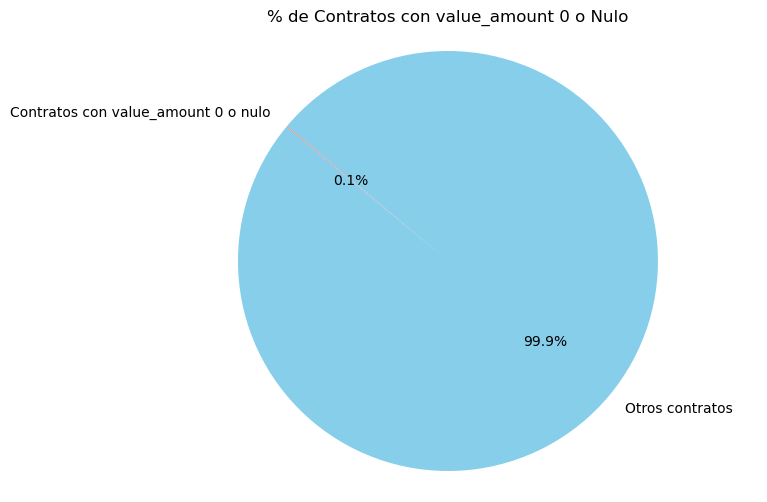

Porcentaje de contratos con value_amount 0 o nulo: 0.08%


In [42]:
# Calcular el número total de contratos
total_contratos = asignacion_df['cve_contrato'].nunique()

# Filtrar contratos con value_amount 0 o nulo
zero_or_null_value_contracts = asignacion_df[asignacion_df['value_amount'].isnull() | (asignacion_df['value_amount'] == 0)]

# Calcular el número de contratos con value_amount 0 o nulo
zero_or_null_value_count = zero_or_null_value_contracts['cve_contrato'].nunique()

# Calcular el porcentaje
percentage_zero_or_null_value = (zero_or_null_value_count / total_contratos) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
labels = ['Contratos con value_amount 0 o nulo', 'Otros contratos']
sizes = [percentage_zero_or_null_value, 100 - percentage_zero_or_null_value]
colors = ['salmon', 'skyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('% de Contratos con value_amount 0 o Nulo')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.show()

# Imprimir el porcentaje
print(f'Porcentaje de contratos con value_amount 0 o nulo: {percentage_zero_or_null_value:.2f}%')


#### 7.2 Porcentaje de contratos sin fecha de registro de inicio del contrato

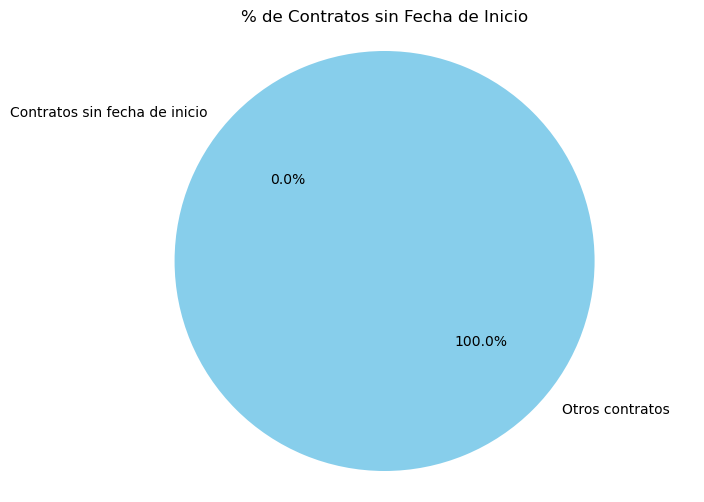

Porcentaje de contratos sin fecha de inicio: 0.00%


In [43]:
# Calcular el número total de contratos
total_contratos = asignacion_df['cve_contrato'].nunique()

# Filtrar contratos con contract_start_date nulo
null_start_date_contracts = asignacion_df[asignacion_df['contract_start_date'].isnull() | (asignacion_df['contract_start_date'] == '')]

# Calcular el número de contratos con contract_start_date nulo
null_start_date_count = null_start_date_contracts['cve_contrato'].nunique()

# Calcular el porcentaje
percentage_null_start_date = (null_start_date_count / total_contratos) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
labels = ['Contratos sin fecha de inicio', 'Otros contratos']
sizes = [percentage_null_start_date, 100 - percentage_null_start_date]
colors = ['salmon', 'skyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('% de Contratos sin Fecha de Inicio')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.show()

# Imprimir el porcentaje
print(f'Porcentaje de contratos sin fecha de inicio: {percentage_null_start_date:.2f}%')


#### 7.3 Porcentaje de contratos sin fecha de registro de inicio del contrato

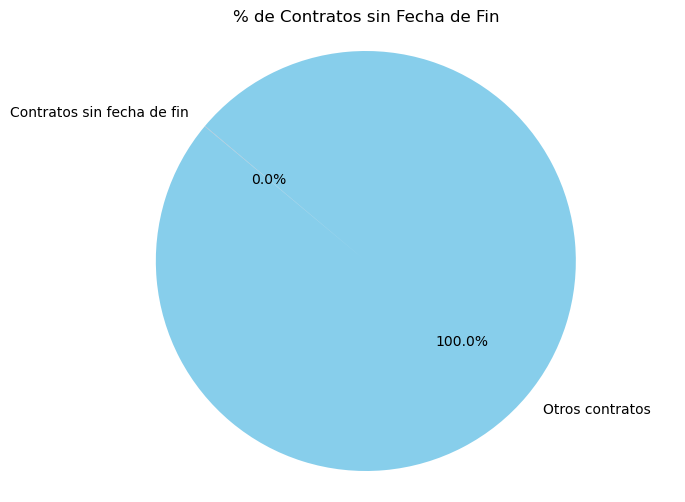

Porcentaje de contratos sin fecha de fin: 0.03%


In [44]:
# Calcular el número total de contratos
total_contratos = asignacion_df['cve_contrato'].nunique()

# Filtrar contratos con contract_end_date nulo
null_end_date_contracts = asignacion_df[asignacion_df['contract_end_date'].isnull() | (asignacion_df['contract_end_date'] == '')]

# Calcular el número de contratos con contract_end_date nulo
null_end_date_count = null_end_date_contracts['cve_contrato'].nunique()

# Calcular el porcentaje
percentage_null_end_date = (null_end_date_count / total_contratos) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
labels = ['Contratos sin fecha de fin', 'Otros contratos']
sizes = [percentage_null_end_date, 100 - percentage_null_end_date]
colors = ['salmon', 'skyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('% de Contratos sin Fecha de Fin')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.show()

# Imprimir el porcentaje
print(f'Porcentaje de contratos sin fecha de fin: {percentage_null_end_date:.2f}%')


#### 7.3 ¿Cuál es la distribución de valores de contrato para cada tipo de moneda?

C:\Users\MottumTech\AppData\Local\Temp\ipykernel_2644\2707623227.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(label)} M' if label >= 1 else f'{label}' for label in labels])
C:\Users\MottumTech\AppData\Local\Temp\ipykernel_2644\2707623227.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(label)} M' if label >= 1 else f'{label}' for label in labels])
C:\Users\MottumTech\AppData\Local\Temp\ipykernel_2644\2707623227.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(label)} M' if label >= 1 else f'{label}' for label in labels])
C:\Users\MottumTech\AppData\Local\Temp\ipykernel_2644\2707623227.py:17: UserWarning: set_ticklabels() should only be used wi

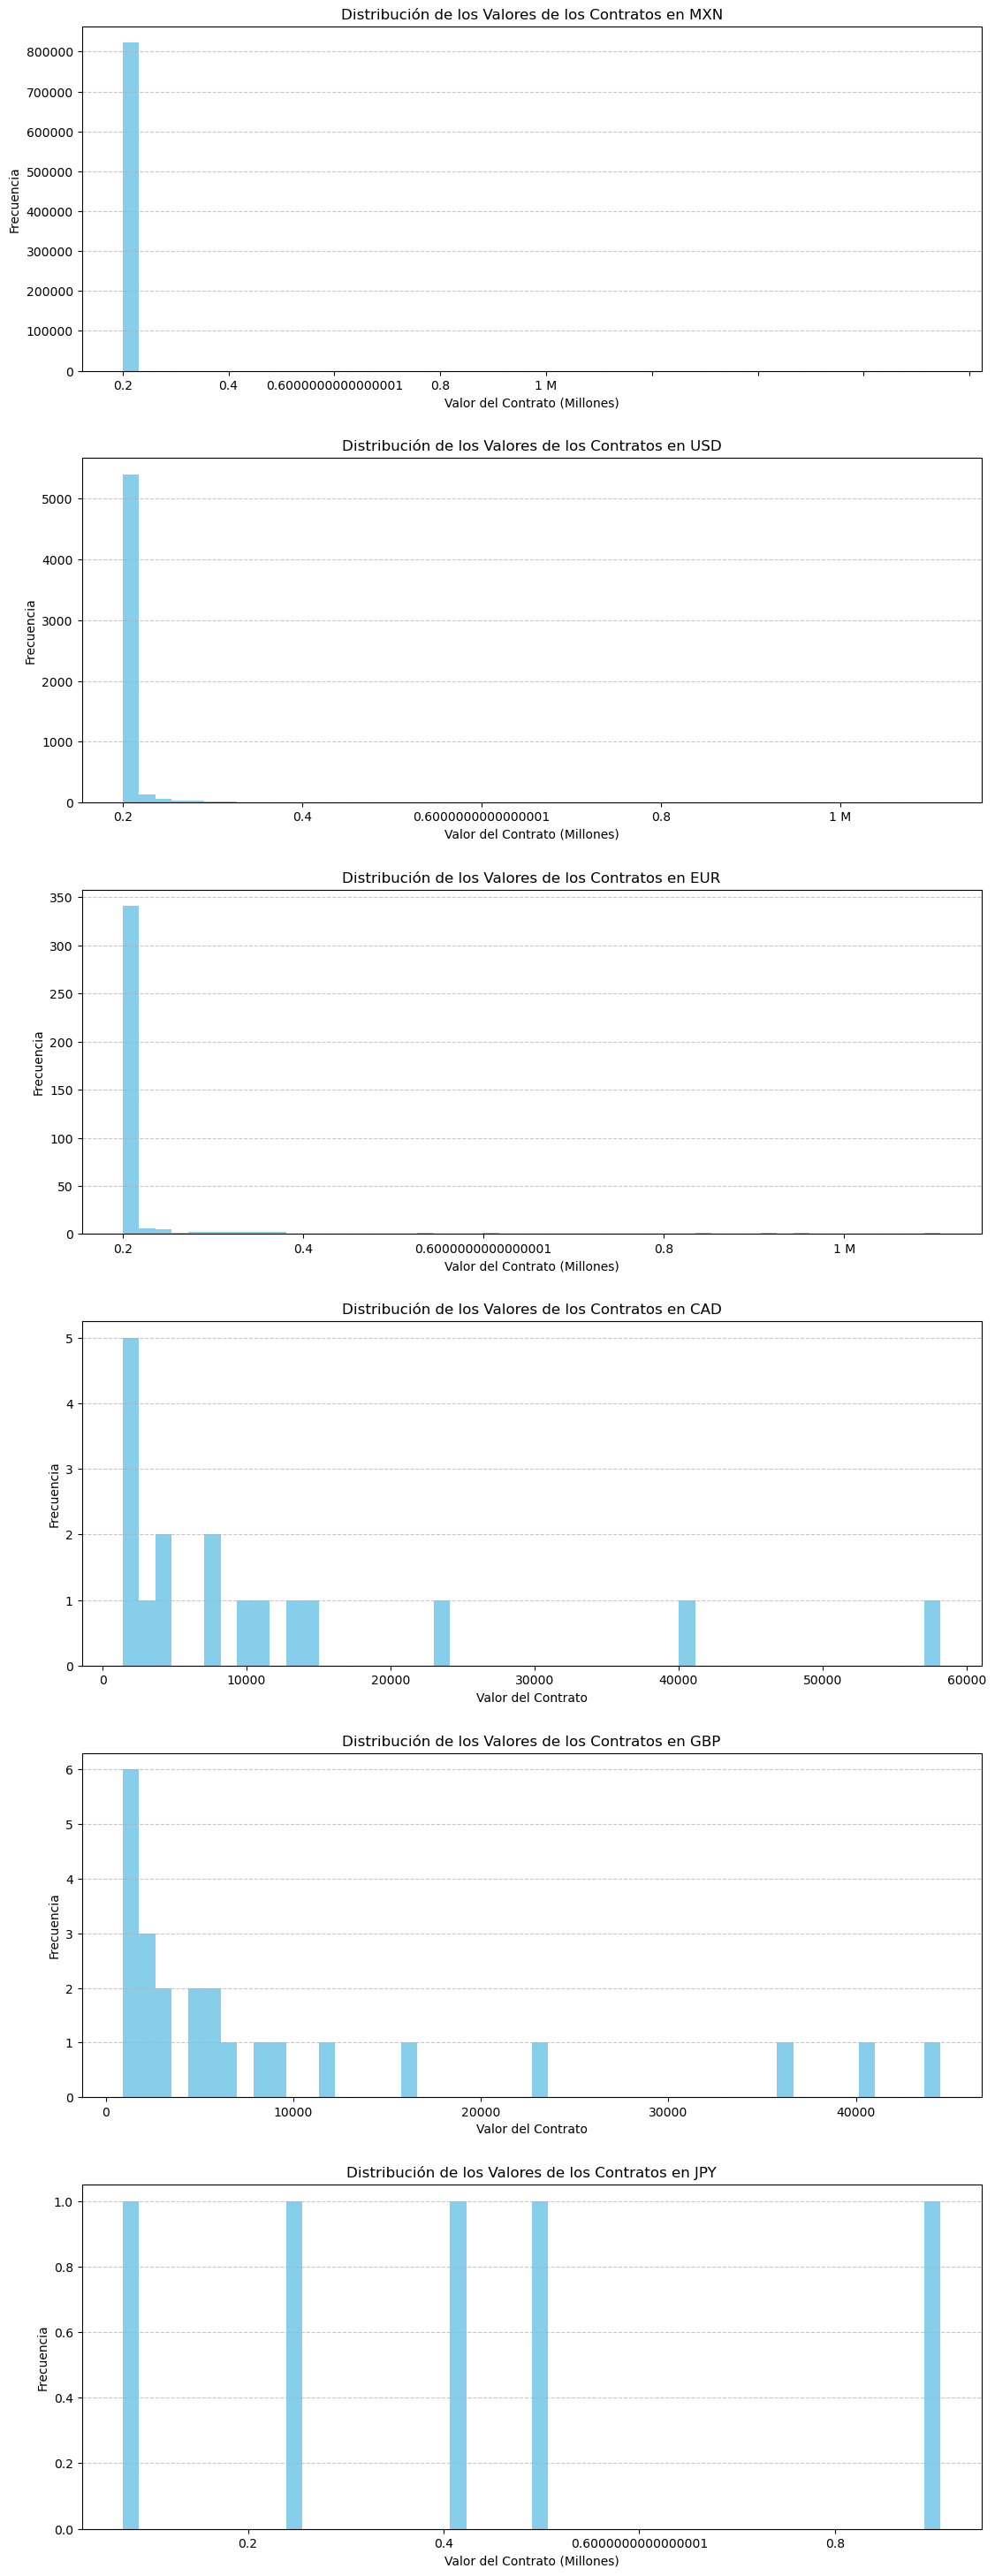

In [60]:
# Crear una lista de las monedas únicas en el dataframe
monedas_unicas = asignacion_df['value_currency'].unique()

# Crear una figura con subplots para cada moneda
fig, axes = plt.subplots(nrows=len(monedas_unicas), ncols=1, figsize=(12, 5 * len(monedas_unicas)))
fig.tight_layout(pad=5.0)

# Iterar sobre cada moneda y crear un histograma
for ax, moneda in zip(axes, monedas_unicas):
    df_moneda = asignacion_df[asignacion_df['value_currency'] == moneda]
    value_amounts = df_moneda['value_amount']
    if value_amounts.max() >= 1e6:
        value_amounts = value_amounts / 1e6
        x_label = 'Valor del Contrato (Millones)'
        # Configurar las etiquetas del eje x para mostrar en millones
        labels = ax.get_xticks().tolist()
        ax.set_xticklabels([f'{int(label)} M' if label >= 1 else f'{label}' for label in labels])
    else:
        x_label = 'Valor del Contrato'

    ax.hist(value_amounts, bins=50, color='skyblue')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de los Valores de los Contratos en {moneda}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### 7.4 ¿Cuáles son los proveedores que han recibido la mayor cantidad de contratos?

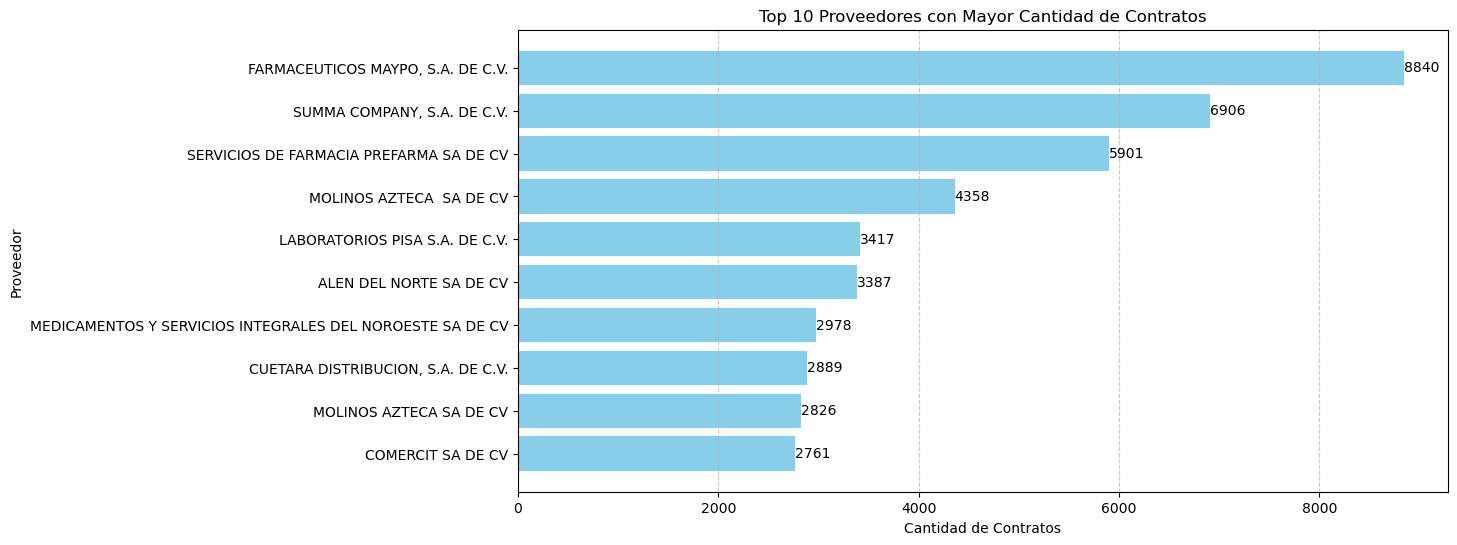

In [57]:
# Asegurarte de que cve_contrato sea de tipo int64 para evitar problemas de duplicados
asignacion_df['cve_contrato'] = asignacion_df['cve_contrato'].astype('int64')

# Agrupar por suppliers_id y contar la cantidad de contratos únicos
contratos_por_proveedor = asignacion_df.groupby('suppliers_name')['cve_contrato'].nunique().reset_index()

# Renombrar columnas para mayor claridad
contratos_por_proveedor.columns = ['Proveedor', 'Cantidad de Contratos']

# Ordenar por la cantidad de contratos en orden descendente
contratos_por_proveedor = contratos_por_proveedor.sort_values(by='Cantidad de Contratos', ascending=False).reset_index(drop=True)

# Mostrar el top 10 proveedores con mayor cantidad de contratos
top_10_proveedores = contratos_por_proveedor.head(10)
#print(top_10_proveedores)

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_10_proveedores['Proveedor'], top_10_proveedores['Cantidad de Contratos'], color='skyblue')
plt.xlabel('Cantidad de Contratos')
plt.ylabel('Proveedor')
plt.title('Top 10 Proveedores con Mayor Cantidad de Contratos')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el top en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores de cantidad de contratos
for i, v in enumerate(top_10_proveedores['Cantidad de Contratos']):
    plt.text(v + 1, i, str(v), va='center')

plt.show()


#### 7.5 ¿Cuántos expedientes tienen documentación asociada?

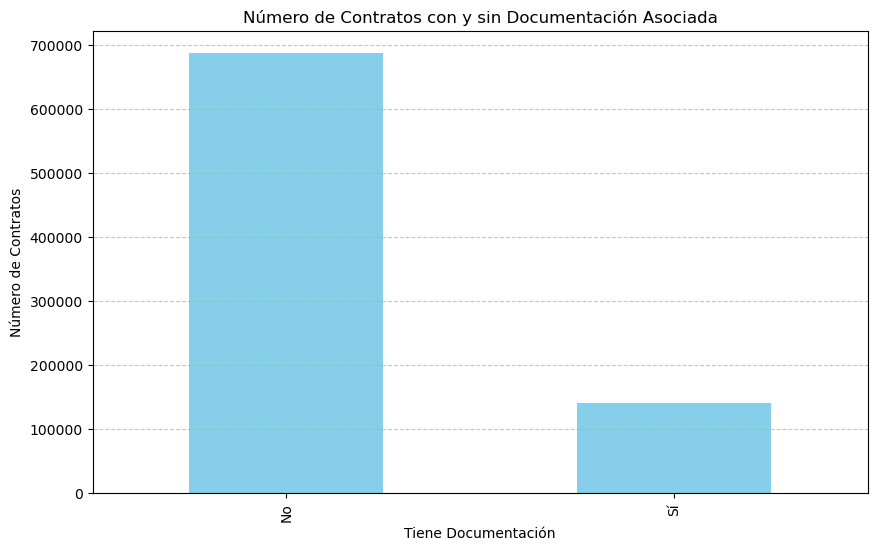

In [58]:
# Contar el número de contratos con y sin documentación
documentacion_asociada = asignacion_df['docs_url_awards'].notnull().value_counts()

# Mostrar los resultados en una gráfica de barras
plt.figure(figsize=(10, 6))
documentacion_asociada.plot(kind='bar', color='skyblue')
plt.xlabel('Tiene Documentación')
plt.ylabel('Número de Contratos')
plt.title('Número de Contratos con y sin Documentación Asociada')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 7.6 ¿Cuál es la duración promedio de los contratos en días?

In [59]:
# Convertir las fechas a formato datetime
asignacion_df['contract_start_date'] = pd.to_datetime(asignacion_df['contract_start_date'], errors='coerce')
asignacion_df['contract_end_date'] = pd.to_datetime(asignacion_df['contract_end_date'], errors='coerce')

# Calcular la duración de cada contrato
asignacion_df['contract_duration'] = (asignacion_df['contract_end_date'] - asignacion_df['contract_start_date']).dt.days

# Calcular la duración promedio
duracion_promedio = asignacion_df['contract_duration'].mean()

print(f"La duración promedio de los contratos es de {duracion_promedio:.2f} días.")


La duración promedio de los contratos es de 109.77 días.
